# Analysis of cell counts dataset.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Q1

In [52]:
ccdf = pd.read_csv("cell-count.csv")
ccdf.head(5)

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,36000,24000,42000,6000,12000
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,30000,22000,40000,2000,6000
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,35000,26250,37500,10000,16250
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,27900,17100,18000,4500,22500
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,60000,30000,37500,4500,18000


Checking to see correctness of data.

In [53]:
ccdf.describe()

,age,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
count,17.000000,13.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,61.588235,2.153846,32927.647059,22382.941176,31974.117647,6224.705882,15784.705882
std,13.973452,4.412976,9575.505554,3694.659600,9303.618959,2554.885315,7975.652887
min,30.000000,0.000000,14000.000000,15200.000000,18000.000000,2000.000000,4600.000000
25%,50.000000,0.000000,28420.000000,20000.000000,24000.000000,4500.000000,12000.000000
50%,65.000000,0.000000,31050.000000,22800.000000,32500.000000,6000.000000,16250.000000
75%,72.000000,0.000000,35000.000000,24150.000000,40000.000000,8400.000000,19800.000000
max,80.000000,14.000000,60000.000000,30000.000000,47150.000000,10800.000000,38000.000000


In [54]:
ccdf.isna().sum()

project                      0
subject                      0
condition                    0
age                          0
sex                          0
treatment                    0
response                     4
sample                       0
sample_type                  0
time_from_treatment_start    4
b_cell                       0
cd8_t_cell                   0
cd4_t_cell                   0
nk_cell                      0
monocyte                     0
dtype: int64

In [55]:
ccdf[ccdf.isna().any(axis=1)] # NaN values are expected and correct.

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,27900,17100,18000,4500,22500
8,prj1,sbj5,healthy,77,M,none,NaN,s9,PBMC,NaN,45500,27300,32500,6500,18200
9,prj2,sbj6,healthy,45,M,none,NaN,s10,PBMC,NaN,28420,21560,21560,8820,17640
10,prj2,sbj7,healthy,80,F,none,NaN,s11,PBMC,NaN,26250,19950,29400,8400,21000


Based on what I can tell, the NaN values are expected, as the subjects are healthy and no treatment is administered.

Next, I calculate the sum of the 5 population counts for each sample and divide the counts by their sums. I use div() and sum() functions instead of apply() as they are vectorized operations that are implemented with NumPy in C. These are highly optimized which lead to faster calculations by avoiding python for loops (which apply() uses).

In [56]:
cell_population_cols = ["b_cell", "cd8_t_cell", "cd4_t_cell", "nk_cell", "monocyte"]
print("Before:")
ccdf[cell_population_cols].head(5)

Before:


,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,36000,24000,42000,6000,12000
1,30000,22000,40000,2000,6000
2,35000,26250,37500,10000,16250
3,27900,17100,18000,4500,22500
4,60000,30000,37500,4500,18000


In [57]:
cell_population_cols_percentages = ["b_cell_percentage", "cd8_t_cell_percentage", "cd4_t_cell_percentage", "nk_cell_percentage", "monocyte_percentage"]

ccdf["total_count"] = ccdf[cell_population_cols].sum(axis=1)
ccdf[cell_population_cols_percentages] = ccdf[cell_population_cols].div(ccdf["total_count"], axis=0)
print("After:")
ccdf[cell_population_cols_percentages].head(5)

After:


,b_cell_percentage,cd8_t_cell_percentage,cd4_t_cell_percentage,nk_cell_percentage,monocyte_percentage
0,0.30,0.20,0.35,0.05,0.10
1,0.30,0.22,0.40,0.02,0.06
2,0.28,0.21,0.30,0.08,0.13
3,0.31,0.19,0.20,0.05,0.25
4,0.40,0.20,0.25,0.03,0.12


To obtain the desired output format, I will have to use the melt() function twice on the raw counts and the percentages and merge the resulting 2 DataFrames.

In [58]:
# melted df for counts
ccdf_melt_counts = ccdf.melt(id_vars=['sample', 'total_count'], 
                    value_vars=cell_population_cols,
                    var_name='population', 
                    value_name='count')

# melted df for percentages
ccdf_melt_percentages = ccdf.melt(id_vars=['sample', 'total_count'], 
                    value_vars=cell_population_cols_percentages,
                    var_name='population', 
                    value_name='percentage')

# rename the populations so it matches that of the first melted df
ccdf_melt_percentages['population'] = ccdf_melt_percentages['population'].str.replace('_percentage', '', regex=False)

# merge the dfs
ccdf_melt_final = ccdf_melt_counts.merge(ccdf_melt_percentages, on=['sample', 'total_count', 'population'])

ccdf_melt_final.head(10)


,sample,total_count,population,count,percentage
0,s1,120000,b_cell,36000,0.30
1,s2,100000,b_cell,30000,0.30
2,s3,125000,b_cell,35000,0.28
3,s4,90000,b_cell,27900,0.31
4,s5,150000,b_cell,60000,0.40
5,s6,110000,b_cell,27500,0.25
6,s7,95000,b_cell,31350,0.33
7,s8,100000,b_cell,35000,0.35
8,s9,130000,b_cell,45500,0.35
9,s10,98000,b_cell,28420,0.29


I then export it as csv to complete Q1.

In [59]:
ccdf_melt_final.to_csv('converted-cell-count.csv', index=False) 

## Q2

In [60]:
# We can simply use ccdf from above
ccdf.head()

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_percentage,cd8_t_cell_percentage,cd4_t_cell_percentage,nk_cell_percentage,monocyte_percentage
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,0.30,0.20,0.35,0.05,0.10
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,0.30,0.22,0.40,0.02,0.06
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,0.28,0.21,0.30,0.08,0.13
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,...,17100,18000,4500,22500,90000,0.31,0.19,0.20,0.05,0.25
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,0.40,0.20,0.25,0.03,0.12


In [61]:
ccdf_filtered = ccdf[(ccdf['treatment'] == 'tr1') & (ccdf['sample_type'] == 'PBMC')]
ccdf_filtered.head()


,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatment_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_percentage,cd8_t_cell_percentage,cd4_t_cell_percentage,nk_cell_percentage,monocyte_percentage
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,0.30,0.20,0.35,0.05,0.10
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,0.30,0.22,0.40,0.02,0.06
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,0.28,0.21,0.30,0.08,0.13
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,0.40,0.20,0.25,0.03,0.12
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,...,24200,33000,5500,19800,110000,0.25,0.22,0.30,0.05,0.18


Similar to before, we melt to obtain percentages for each population.

In [62]:
ccdf_melt_percentages = ccdf_filtered.melt(id_vars=['sample', 'response'], 
                    value_vars=cell_population_cols_percentages,
                    var_name='population', 
                    value_name='percentage')

# rename the populations so it matches the actual names
ccdf_melt_percentages['population'] = ccdf_melt_percentages['population'].str.replace('_percentage', '', regex=False)

### 2a
Now, we can plot the boxplots as shown below.

/var/folders/43/92mz51kn68n81t5yfmvkk1pc0000gn/T/ipykernel_52874/2287796033.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=ccdf_melt_percentages, x='population', y='percentage', hue='response', palette=sns.color_palette("bright"))


Text(0, 0.5, 'Relative Frequency (percentage)')

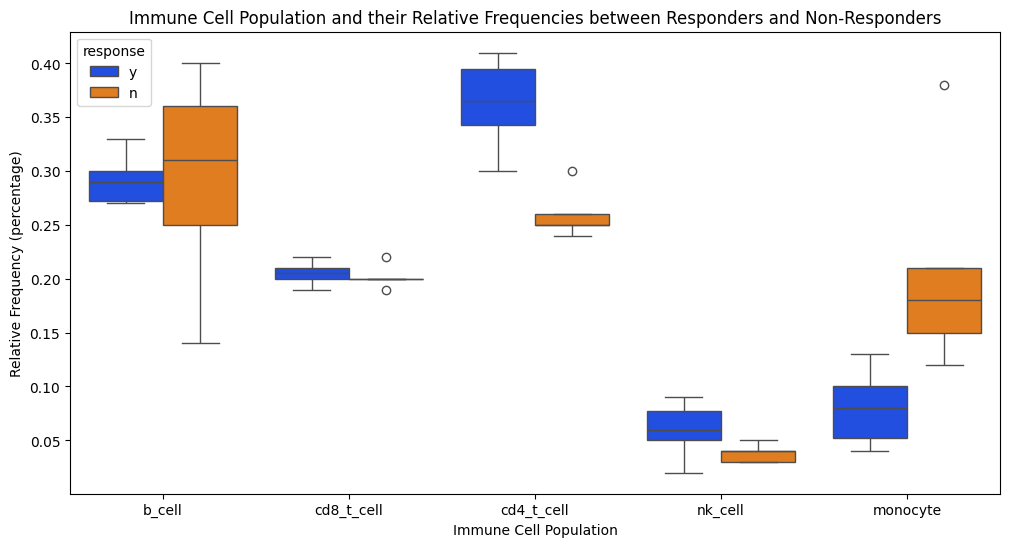

In [69]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ccdf_melt_percentages, x='population', y='percentage', hue='response', palette=sns.color_palette("bright"))

plt.title("Immune Cell Population and their Relative Frequencies between Responders and Non-Responders")
plt.xlabel("Immune Cell Population")
plt.ylabel("Relative Frequency (percentage)")

### 2b
Visually, I can see large differences in the cd4_t_cell population, but I should use a statistical test to formally describe the differences.

I first considered using a paired t-test. However, this is not applicable here as responders and non-responders are groups that are independent of each other, and not the same groups exposed to different conditions.

If the values for responders and non-responders are normally distributed, then we can use an independent t-test. Otherwise, I'd opt to use Mann-Whitney U test as it has no assumption of a normal distribution in the data.

I used the Shapiro Wilk Test to determine if the data comes from a normal distribution.

In [74]:
import scipy.stats as stats

ccdf_filtered_response = ccdf_filtered[ccdf_filtered['response'] == 'y']
ccdf_filtered_nonresponse = ccdf_filtered[ccdf_filtered['response'] == 'n']

for population in cell_population_cols:
    response_values = ccdf_filtered_response[population].dropna()
    nonresponse_values = ccdf_filtered_nonresponse[population].dropna()
    
    stat_response, p_response = stats.shapiro(response_values)
    stat_nonresponse, p_nonresponse = stats.shapiro(nonresponse_values)

    print("Cell population: " + population)
    print("p_response:", p_response)
    print("p_nonresponse:", p_nonresponse)
    print()

Cell population: b_cell
p_response: 0.7740345230659855
p_nonresponse: 0.2526273100185356

Cell population: cd8_t_cell
p_response: 0.5748787486233051
p_nonresponse: 0.7876382877280294

Cell population: cd4_t_cell
p_response: 0.78912551641099
p_nonresponse: 0.5110514294782948

Cell population: nk_cell
p_response: 0.679863686355094
p_nonresponse: 0.6968627374840806

Cell population: monocyte
p_response: 0.286512374824737
p_nonresponse: 0.22329432779458908



Since we see all p-values > 0.05, we fail to reject the null hypothesis that the data comes from a population that is normally distributed. Hence, I proceed to use an independent t-test.

In [76]:
print("Listed are the populations with statistically significant differences:")

for population in cell_population_cols:
    response_values = ccdf_filtered_response[population].dropna()
    nonresponse_values = ccdf_filtered_nonresponse[population].dropna()
    
    t_stat, p_value = stats.ttest_ind(response_values, nonresponse_values, equal_var=True) # independent t-test
        
    if p_value < 0.05:
        print("Cell population: " + population)
        print("p_value:", p_value)
        print()

Listed are the populations with statistically significant differences:
Cell population: cd4_t_cell
p_value: 0.0018191455308159796

Cell population: monocyte
p_value: 0.02188903118727363



Hence, using an independent t-test, I have determined that *cd4_t_cell* and *monocyte* are significantly different in relative frequencies between responders and non-responders.